# Feelings Unleashed

The "Emotions" dataset presents a comprehensive collection of English Twitter messages meticulously annotated with six fundamental emotions: sadness, joy, love, anger, fear, and surprise. With a total of 416,809 entries, each comprising a text segment representing a Twitter message and a corresponding label indicating the predominant emotion conveyed, this dataset provides a rich resource for understanding and analyzing the diverse spectrum of emotions expressed in short-form text on social media platforms.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

One of the primary strengths of this dataset lies in its clarity and organization. The key features, including the text content and emotion labels, are neatly structured, enabling easy access and manipulation for analysis purposes. Moreover, the dataset's potential applications span a wide range of fields, from sentiment analysis and emotion classification to textual analysis and linguistic pattern exploration.

In [2]:
df = pd.read_csv("/kaggle/input/emotions/text.csv")

In [3]:
df.head()

,Unnamed: 0,text,label
0,0,i just feel really helpless and heavy hearted,4
1,1,ive enjoyed being able to slouch about relax a...,0
2,2,i gave up my internship with the dmrg and am f...,4
3,3,i dont know i feel so lost,0
4,4,i am a kindergarten teacher and i am thoroughl...,4


In [4]:
df.describe()

,Unnamed: 0,label
count,416809.000000,416809.000000
mean,208404.000000,1.554271
std,120322.538513,1.490453
min,0.000000,0.000000
25%,104202.000000,0.000000
50%,208404.000000,1.000000
75%,312606.000000,3.000000
max,416808.000000,5.000000


Exploratory data analysis of the Emotions dataset reveals several interesting insights. Visualizations such as emotion distribution histograms and pie charts showcase the prevalence of different emotions within the Twitter messages. Additionally, word clouds for each emotion provide a glimpse into the language and vocabulary associated with specific emotional states, offering valuable context for further analysis.

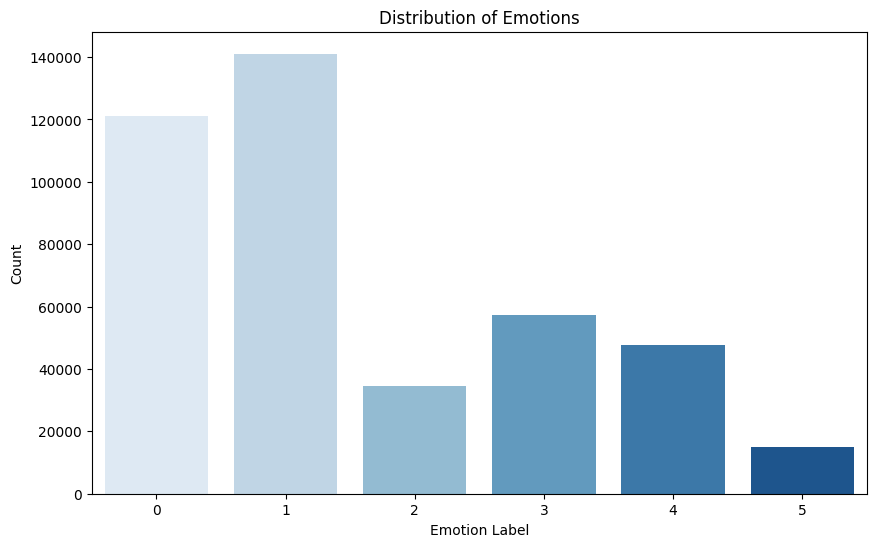

In [5]:
# Countplot for emotion distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='label', palette='Blues')
plt.title('Distribution of Emotions')
plt.xlabel('Emotion Label')
plt.ylabel('Count')
plt.show()

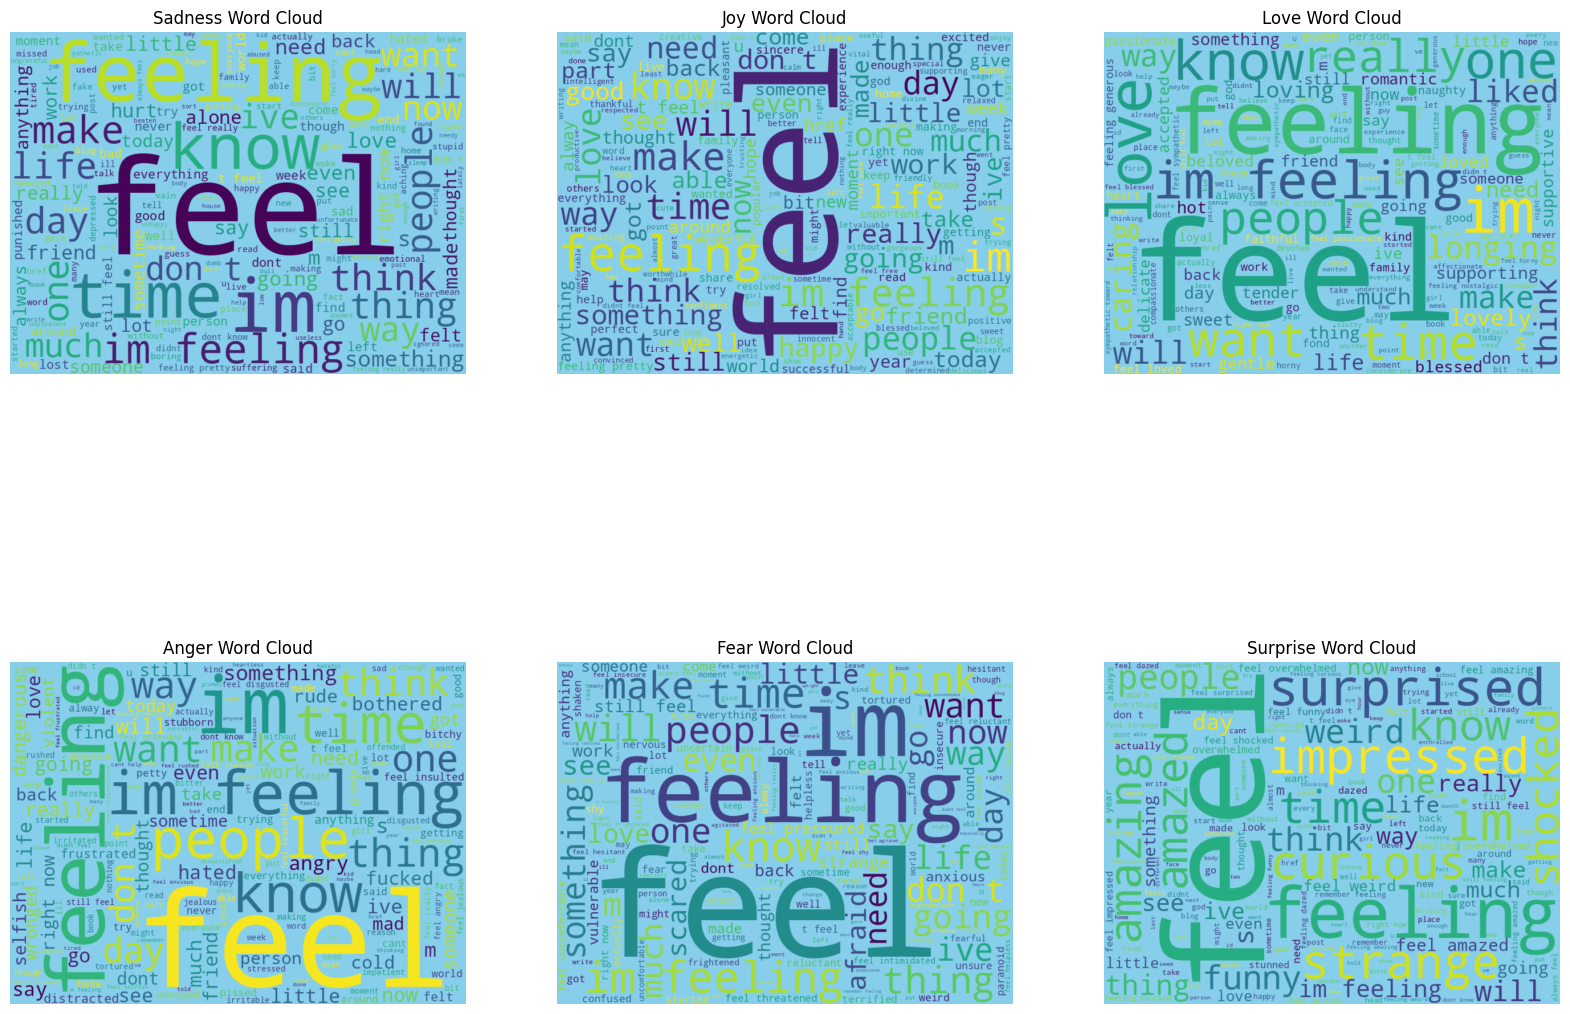

In [6]:
from wordcloud import WordCloud

# Generate word cloud for each emotion
emotions = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
plt.figure(figsize=(20, 15))
for i, emotion in enumerate(emotions, 1):
    plt.subplot(2, 3, i)
    subset = df[df['label'] == i-1]
    text = ' '.join(subset['text'])
    wordcloud = WordCloud(width=800, height=600, background_color='skyblue').generate(text)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(emotion.capitalize() + ' Word Cloud')
    plt.axis('off')
plt.show()

Furthermore, the dataset facilitates the development and evaluation of machine learning models aimed at tasks such as sentiment analysis and emotion classification. By leveraging advanced techniques in natural language processing (NLP) and machine learning, researchers and practitioners can gain deeper insights into the nuanced emotional landscape within the realm of social media, thereby contributing to advancements in fields such as affective computing and human-computer interaction.

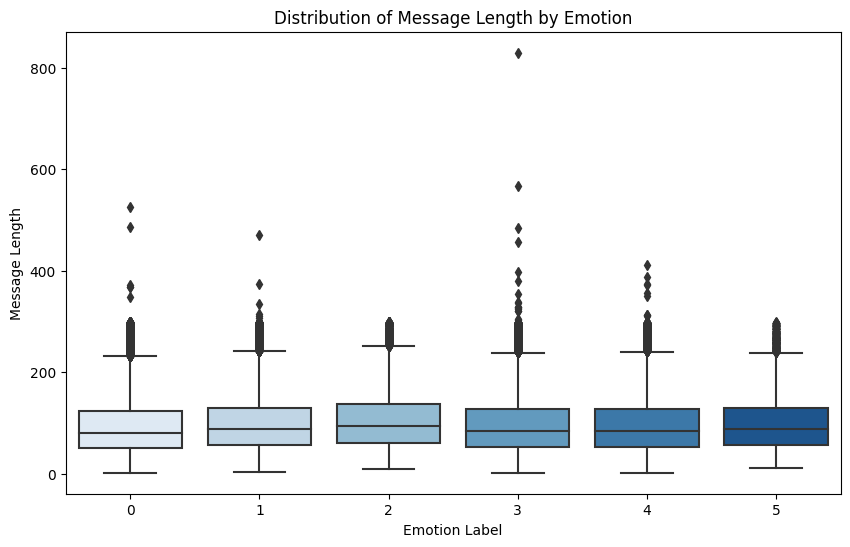

In [7]:
# Create a new column for message length
df['message_length'] = df['text'].apply(len)

# Boxplot for message length distribution by emotion
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='label', y='message_length', palette='Blues')
plt.title('Distribution of Message Length by Emotion')
plt.xlabel('Emotion Label')
plt.ylabel('Message Length')
plt.show()

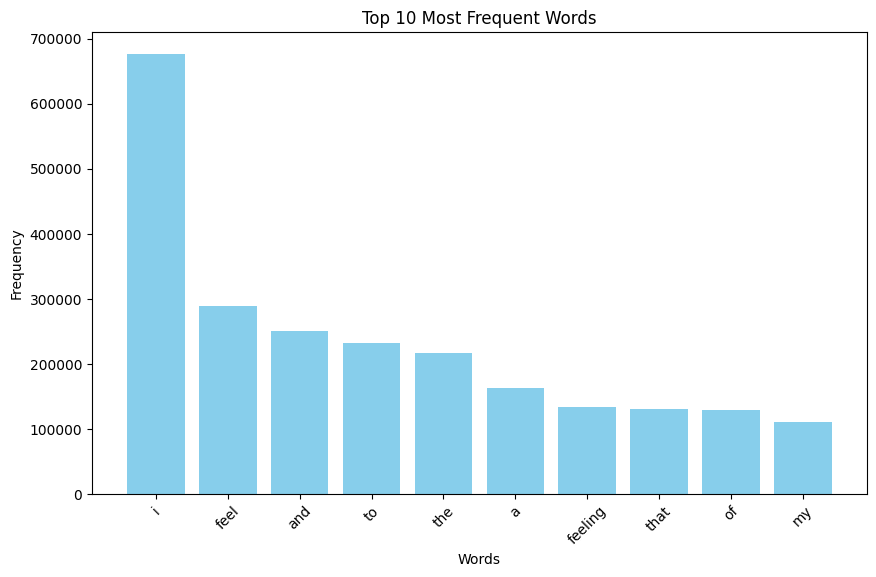

In [8]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Tokenize words and count frequency
all_words = ' '.join(df['text'])
tokens = word_tokenize(all_words)
word_freq = Counter(tokens)

# Plot top 10 most frequent words
plt.figure(figsize=(10, 6))
common_words = word_freq.most_common(10)
words, counts = zip(*common_words)
plt.bar(words, counts, color='skyblue')
plt.title('Top 10 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

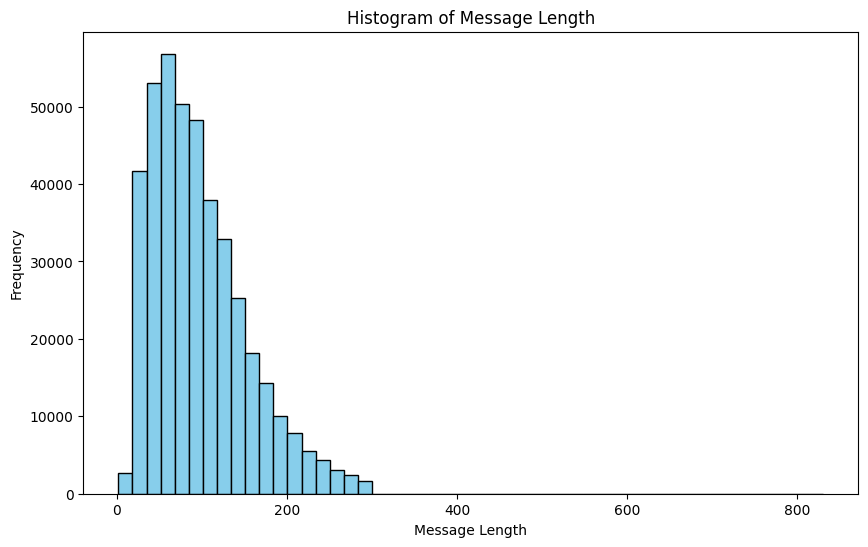

In [9]:
# Histogram for message length distribution
plt.figure(figsize=(10, 6))
plt.hist(df['message_length'], bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Message Length')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

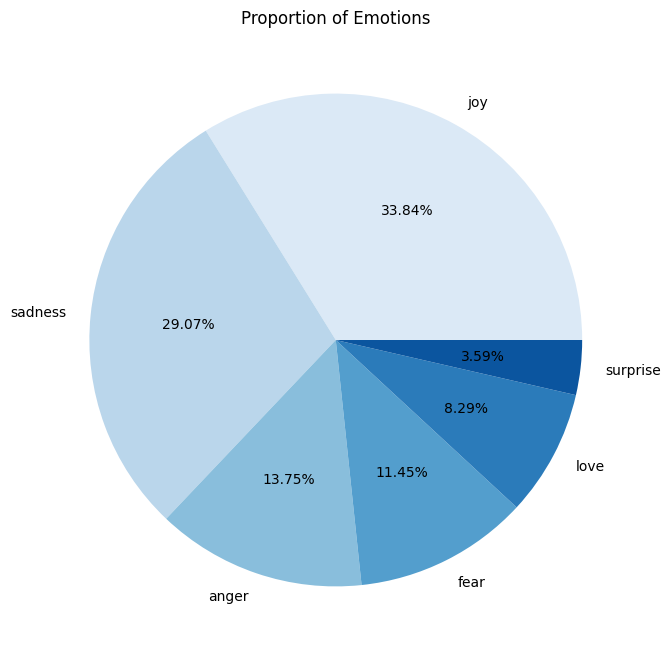

In [10]:
# Calculate emotion proportions
emotion_counts = df['label'].value_counts()
labels = [emotions[i] for i in emotion_counts.index]
sizes = emotion_counts.values

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', colors=sns.color_palette('Blues'))
plt.title('Proportion of Emotions')
plt.show()

In conclusion, the Emotions dataset serves as a valuable resource for researchers, data scientists, and practitioners interested in understanding and analyzing emotional expressions in short-form text on social media platforms. Its structured format, rich content, and potential applications make it a valuable asset for exploring the intricate interplay between language and emotion in online communication.